# Classificação de Clientes
O objetivo deste processo é classificar novos clientes a partir dos clusters de clientes atuais

Ao logo do tempo novos clientes farão parte do processo de classificação, trazendo uma retroalimentação para o processo de classificação

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# carrega o dataset
dataset = pd.read_csv('01.1-clusterizacao-kmeans.csv', delimiter=';', decimal=',')

faturamentoBruto = dataset['faturamentoBruto']
margemBruta = dataset['margemBruta']
restricoes = dataset['restricoes']
cluster = dataset["cluster"]

dataset_norm = pd.concat([faturamentoBruto, margemBruta, restricoes], axis=1)

scaler = MinMaxScaler()
dataset_norm = scaler.fit_transform(dataset_norm)
dataset_norm = pd.DataFrame(dataset_norm, columns = ['faturamentoBruto','margemBruta','restricoes'])
dataset_norm = pd.concat([dataset_norm, cluster], axis=1)

# print(dataset.head())

Temos 7 clusters de clientes, distribuidos conforme vemos visualmente abaixo

<AxesSubplot:xlabel='cluster', ylabel='count'>

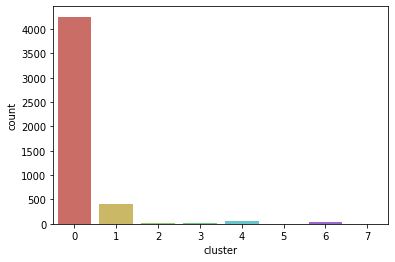

In [4]:
sb.countplot(x='cluster', data=dataset, palette='hls')

## classificação 
O processo de classificação passa pelo uso dos dados de clientes já conhecidos e clusterizados. Utilizamos o mecanismos de testes a partir dos clientes já conhecidos onde vemos a performance de classificação de 100%. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1276
           1       1.00      1.00      1.00       125
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

1.0


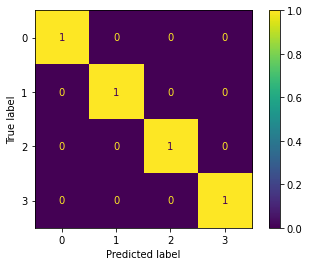

In [5]:
dataset0 = dataset_norm[(dataset_norm['cluster'] == 0)]
dataset1 = dataset_norm[(dataset_norm['cluster'] == 1)]
dataset2 = dataset_norm[(dataset_norm['cluster'] == 2)]
dataset3 = dataset_norm[(dataset_norm['cluster'] == 3)]

X0 = dataset0.iloc[:,[0,1,2]].values
y0 = dataset0.iloc[:,3].values
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=.3, random_state=25)

X1 = dataset1.iloc[:,[0,1,2]].values
y1 = dataset1.iloc[:,3].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.3, random_state=25)

X2 = dataset2.iloc[:,[0,1,2]].values
y2 = dataset2.iloc[:,3].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.3, random_state=25)

X3 = dataset3.iloc[:,[0,1,2]].values
y3 = dataset3.iloc[:,3].values
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=.3, random_state=25)

X_train = np.concatenate([X0_train, X1_train, X2_train, X3_train], axis=0)
X_test = np.concatenate([X0_test, X1_test, X2_test, X3_test], axis=0)
y_train = np.concatenate([y0_train, y1_train, y2_train, y3_train], axis=0)
y_test = np.concatenate([y0_test, y1_test, y2_test, y3_test], axis=0)

#Classif_KNN = KNeighborsClassifier(n_neighbors=4)
#Classif_KNN.fit(X_train, y_train)
#y_pred = Classif_KNN.predict(X_test)

from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

# plot_confusion_matrix(Classif_KNN, X_test, y_test, normalize = 'true')

# print(classification_report(y_test, y_pred))
# print(accuracy_score(y_test, y_pred))


# testa do K=1 até K=26
#k_range = range(1, 26)

# Lista todas as acurácias
#scores = []

# Faz um loop de 1 a 26 armazena no dicionário scores
#for k in k_range:
#    knn = KNeighborsClassifier(n_neighbors=k)
#    knn.fit(X_train, y_train)
#    y_pred = knn.predict(X_test)
#    scores.append(accuracy_score(y_test, y_pred))

#print(scores)
#Plota os valores de acc. em função do valor escolhido de K
# plt.plot(k_range, scores)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Testing Accuracy')

#Avaliando a melhor configuração de KNN
best_KNN = KNeighborsClassifier(n_neighbors=3)
best_KNN.fit(X_train, y_train)
y_pred = best_KNN.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(best_KNN, X_test, y_test, normalize = 'true')

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

In [6]:
def ajustaDatasete(datasete):
# periodoDemonstrativoEmMeses -> converte valores nulos ou 0 em 1
    datasete['periodoDemonstrativoEmMeses'] = datasete['periodoDemonstrativoEmMeses'].replace(np.nan, 1)
    datasete['periodoDemonstrativoEmMeses'] = datasete['periodoDemonstrativoEmMeses'].replace(0, 1)

# faturamentoBruto -> converte valores nulos em 0 e divide pelo periodoDemonstrativoEmMeses
    datasete['faturamentoBruto'] = datasete['faturamentoBruto'].replace(np.nan, 0)
    datasete['faturamentoBruto'] = datasete['faturamentoBruto'] / datasete['periodoDemonstrativoEmMeses']

# margemBruta -> converte valores nulos em 0 e divide pelo periodoDemonstrativoEmMeses
    datasete['margemBruta'] = datasete['margemBruta'].replace(np.nan, 0)
    datasete['margemBruta'] = datasete['margemBruta'] / datasete['periodoDemonstrativoEmMeses']

# monta o datasete que será trabalhado
    datasete = pd.concat([
        datasete["faturamentoBruto"],
        datasete["margemBruta"],
        datasete["restricoes"]
    ], axis=1)

# faturamentoBruto -> remove valores nulos ou inferiores a 1.000,00 (outliers?)
    datasete.dropna(subset=['faturamentoBruto'], inplace=True)
    faturamentoBrutoIdx = datasete[(datasete['faturamentoBruto'] < 1000.0)].index
    datasete.drop(faturamentoBrutoIdx, inplace=True)
# faturamentoBruto -> remove valores nulos ou superiores a 550.000.000,00 (fora do modelo)
    faturamentoBrutoIdx = datasete[(datasete['faturamentoBruto'] > 550000000.0)].index
    datasete.drop(faturamentoBrutoIdx, inplace=True)

# restricoes -> converte valores nulos em falso e transforma bool em int
    datasete['restricoes'] = datasete['restricoes'].replace(np.nan, False)
    datasete['restricoes'] = datasete['restricoes'].astype(int)

# indexa novamente o datasete para remover índices ainda em memória
    datasete.reset_index(drop=True, inplace=True)
    
    return(datasete)


## Teste do Classificador utilizando dados Reais
Buscamos um arquivo da CVM, com dados de resultado de empresas abertas do ano de 2016

A partir destes dados, efetuamos a preparação para aplicação do modelo, normalizando o faturamento e margem para período mensal. 

Como um modelo de classificação trabalha com situações previamente conhecidas, eliminamos empresas com faturamento acima dos conhecidos. Estes dados devem ser utilizados para novo treinamento dos modelos, de forma a retroalimenta-lo.

In [7]:
# Dados Obtidos da CVM - http://dados.cvm.gov.br/dataset/cia_aberta-doc-dfp/resource/fdf29235-55ab-40e7-8de8-3a9bc58621ed
# carrega o dataset de novos clientes
novosclientes = pd.read_csv('novos-clientes-meu.csv', delimiter=';', decimal=',')
#LOCAL
print(novosclientes.count())

#novosclientes = pd.read_csv('novos-clientes.csv', encoding = "ISO-8859-1")

newDataset = ajustaDatasete(novosclientes)
# newDataset.head()
print(newDataset.count())

#Normaliza pelo escalar
    # scaler = MinMaxScaler()
datasete_norm = scaler.transform(newDataset)
datasete_norm = pd.DataFrame(datasete_norm, columns = ['faturamentoBruto','margemBruta','restricoes'])
    #datasete = pd.concat([datasete, cluster], axis=1)


FileNotFoundError: [Errno 2] No such file or directory: 'novos-clientes-meu.csv'

In [8]:
def classificaClientes(clientes):
    return best_KNN.predict(clientes)
    

In [9]:
clientesClassificados = classificaClientes(datasete_norm)
#clientesClassificados.head()
clientesClassificados

NameError: name 'datasete_norm' is not defined

In [10]:
newDataset['cluster'] = pd.DataFrame(clientesClassificados)
newDataset

NameError: name 'clientesClassificados' is not defined

In [57]:
newDataset.groupby(by=['cluster']).count()

,faturamentoBruto,margemBruta,restricoes
cluster,,,
0,141,141,141
1,17,17,17
2,5,5,5
3,86,86,86


In [58]:
# salva os dados clusterizados em csv
newDataset.to_csv(path_or_buf='02.1-classificacao-knn.csv', sep=';', decimal=',')